In [8]:
from __future__ import print_function

import time 
import requests
import cv2
import operator
import numpy as np

# Import library to display results
import matplotlib.pyplot as plt
%matplotlib inline 
# Display images within Jupyter

In [9]:
# Variables
_region = 'francecentral' #Here you enter the region of your subscription
_url = 'https://{}.api.cognitive.microsoft.com/vision/v2.0/analyze'.format(_region)
_key = None #Here you have to paste your primary key
_maxNumRetries = 10


In [10]:
def processRequest( json, data, headers, params ):

    """
    Helper function to process the request to Project Oxford

    Parameters:
    json: Used when processing images from its URL. See API Documentation
    data: Used when processing image read from disk. See API Documentation
    headers: Used to pass the key information and the data type request
    """

    retries = 0
    result = None

    while True:

        response = requests.request( 'post', _url, json = json, data = data, headers = headers, params = params )

        if response.status_code == 429: 

            print( "Message: %s" % ( response.json() ) )

            if retries <= _maxNumRetries: 
                time.sleep(1) 
                retries += 1
                continue
            else: 
                print( 'Error: failed after retrying!' )
                break

        elif response.status_code == 200 or response.status_code == 201:

            if 'content-length' in response.headers and int(response.headers['content-length']) == 0: 
                result = None 
            elif 'content-type' in response.headers and isinstance(response.headers['content-type'], str): 
                if 'application/json' in response.headers['content-type'].lower(): 
                    result = response.json() if response.content else None 
                elif 'image' in response.headers['content-type'].lower(): 
                    result = response.content
        else:
            print( "Error code: %d" % ( response.status_code ) )
            print( "Message: %s" % ( response.json() ) )

        break
        
    return result

In [15]:
def renderResultOnImage( result, img ):
    
    """Display the obtained results onto the input image"""

    R = int(result['color']['accentColor'][:2],16)
    G = int(result['color']['accentColor'][2:4],16)
    B = int(result['color']['accentColor'][4:],16)

    cv2.rectangle( img,(0,0), (img.shape[1], img.shape[0]), color = (R,G,B), thickness = 25 )

    if 'description' in result:
        description = result['description']['captions'][0]['text']
        cv2.putText( img, description, (30,70), cv2.FONT_HERSHEY_PLAIN, 2, (255,0,0), 3 )
        


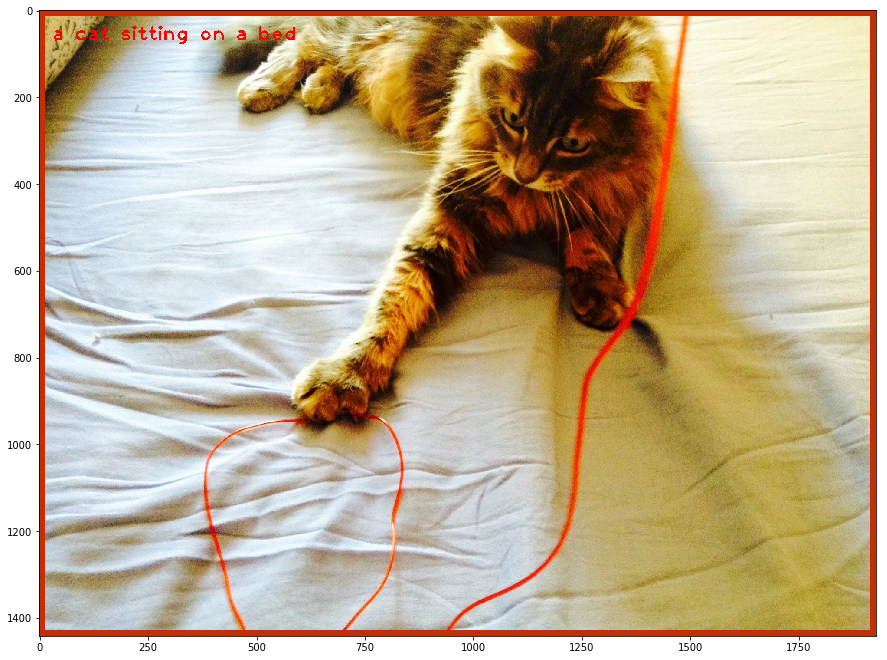

In [12]:
# URL direction to image
urlImage = 'https://lh3.googleusercontent.com/kITHV6sLTxDc1uuhK4kL3jo4vwTD7fId4hX_-C80QrMF5FzZ-TjXK3oOQBm2oERoV4RoBwBahFD_0_4jDjrkCLeRcxkPyPGNIHNtIwJwTYD1Jjq_PA14vyqy02tpRfgoTtPi1Cx2crB534ohAQuBTS4AHxDeCcsv56aBEUVbl7P5IXzLj9csZw4VIO5lA3GTJq6sxsJliMEiYsNprH2zOZNRCsa7uUkZImhEwpcIm9jdnXcLzJTtUykPsiHkGa38Zg_fy6aTi9CgjtCUTHYIiEpidmcLYbp5yySmv7_B2sCfR71ICpSJAm2XBi7Qh3ZhYhacfBbtFgBtR4W9MYTd-FORYY_o14vrjwkOBf_gOhRAANCff697P6RHf_2x5mo_C08ADVsqLauPvYNhZgn5CUApfU9lP7_6BFKdWAhw_mjZSE4pOjYmDxghj6FjV03EiBvRMhOLEn0N9i9hGyXyWsp4aFOTC11gcecaDW7pZcG9AlFC8I1Svvr4gDzLADA-uYpIXpxkH8X8uyrWI2ytkkrXTGKh8p_nCLrjPEbCZSDfeGeWlu1M3dr0nz32acnsn1jjMKizJ3xUcTZHJk3npl1Tls0MMwwJ2rrvAcSGS_GQo34Xmn55hr03U1sTE-Mml8EEI6h9yvOdn7gKSdTGmeH2HDhweNve=w1932-h1442-no'

# Computer Vision parameters
params = { 'visualFeatures' : 'Categories,Color,Description'} 

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/json' 

json = { 'url': urlImage } 
data = None

result = processRequest( json, data, headers, params )

if result is not None:
    # Load the original image, fetched from the URL
    arr = np.asarray( bytearray( requests.get( urlImage ).content ), dtype=np.uint8 )
    img = cv2.cvtColor( cv2.imdecode( arr, -1 ), cv2.COLOR_BGR2RGB )

    renderResultOnImage( result, img )

    ig, ax = plt.subplots(figsize=(15, 20))
    ax.imshow( img )

In [13]:
print(result)

{'categories': [{'name': 'others_', 'score': 0.00390625}], 'color': {'dominantColorForeground': 'White', 'dominantColorBackground': 'White', 'dominantColors': ['White', 'Yellow'], 'accentColor': 'C32F08', 'isBwImg': False, 'isBWImg': False}, 'description': {'tags': ['cat', 'sitting', 'laying', 'small', 'bed', 'brown', 'dog', 'white'], 'captions': [{'text': 'a cat sitting on a bed', 'confidence': 0.8180434579658808}]}, 'requestId': '121d61a2-e06b-4154-b511-61e116b9e4d2', 'metadata': {'width': 1930, 'height': 1442, 'format': 'Jpeg'}}


In [14]:
if 'description' in result:
    description = result['description']['captions'][0]['text']
    print(description)

a cat sitting on a bed
